In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

## IMPORT DATASET

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.shape

(30, 17)

In [5]:
df.isnull().values.any()

False

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Correlation of columns with ['W']

In [9]:
df.corr()['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

<AxesSubplot:>

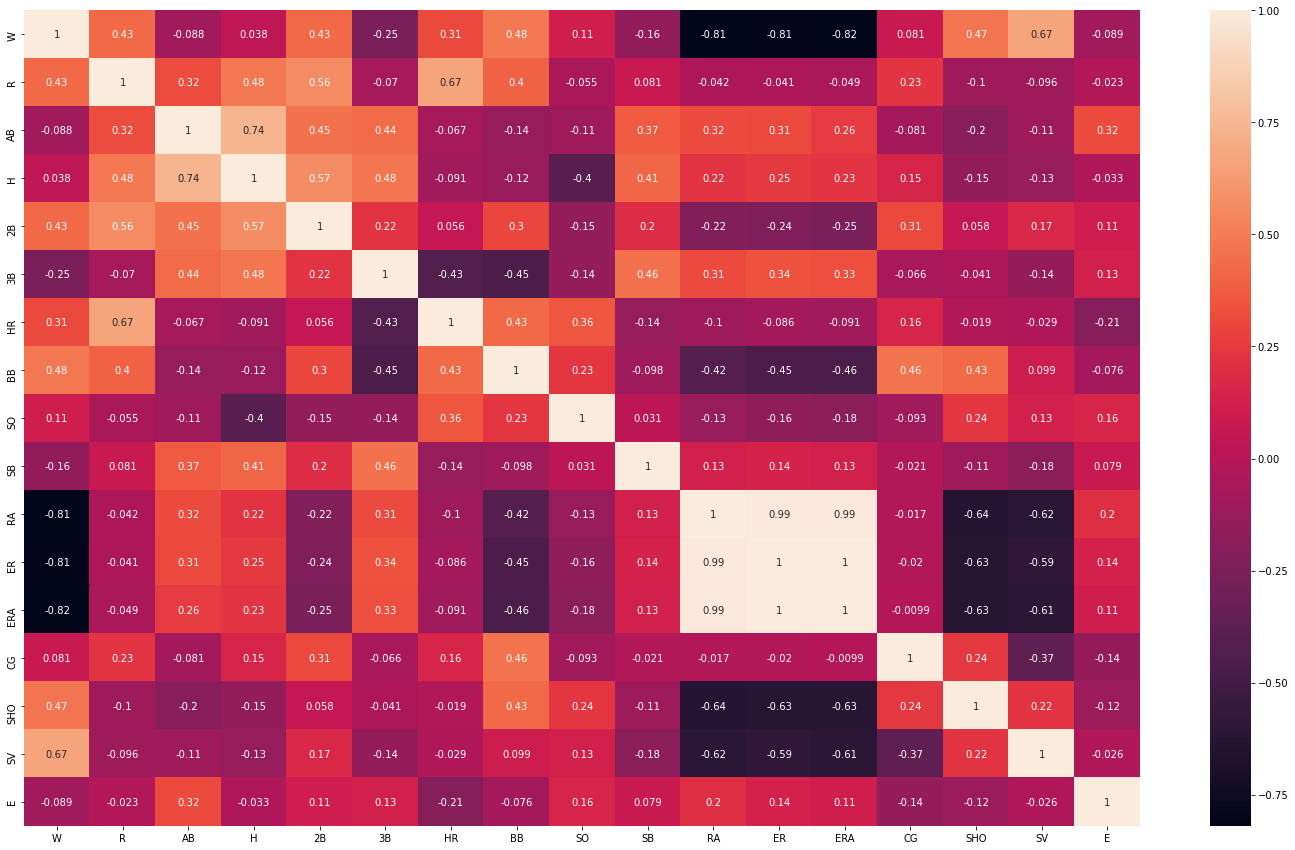

In [10]:
plt.figure(figsize=[25,15]) #heatmap to check correlation
sn.heatmap(df.corr(),annot=True)

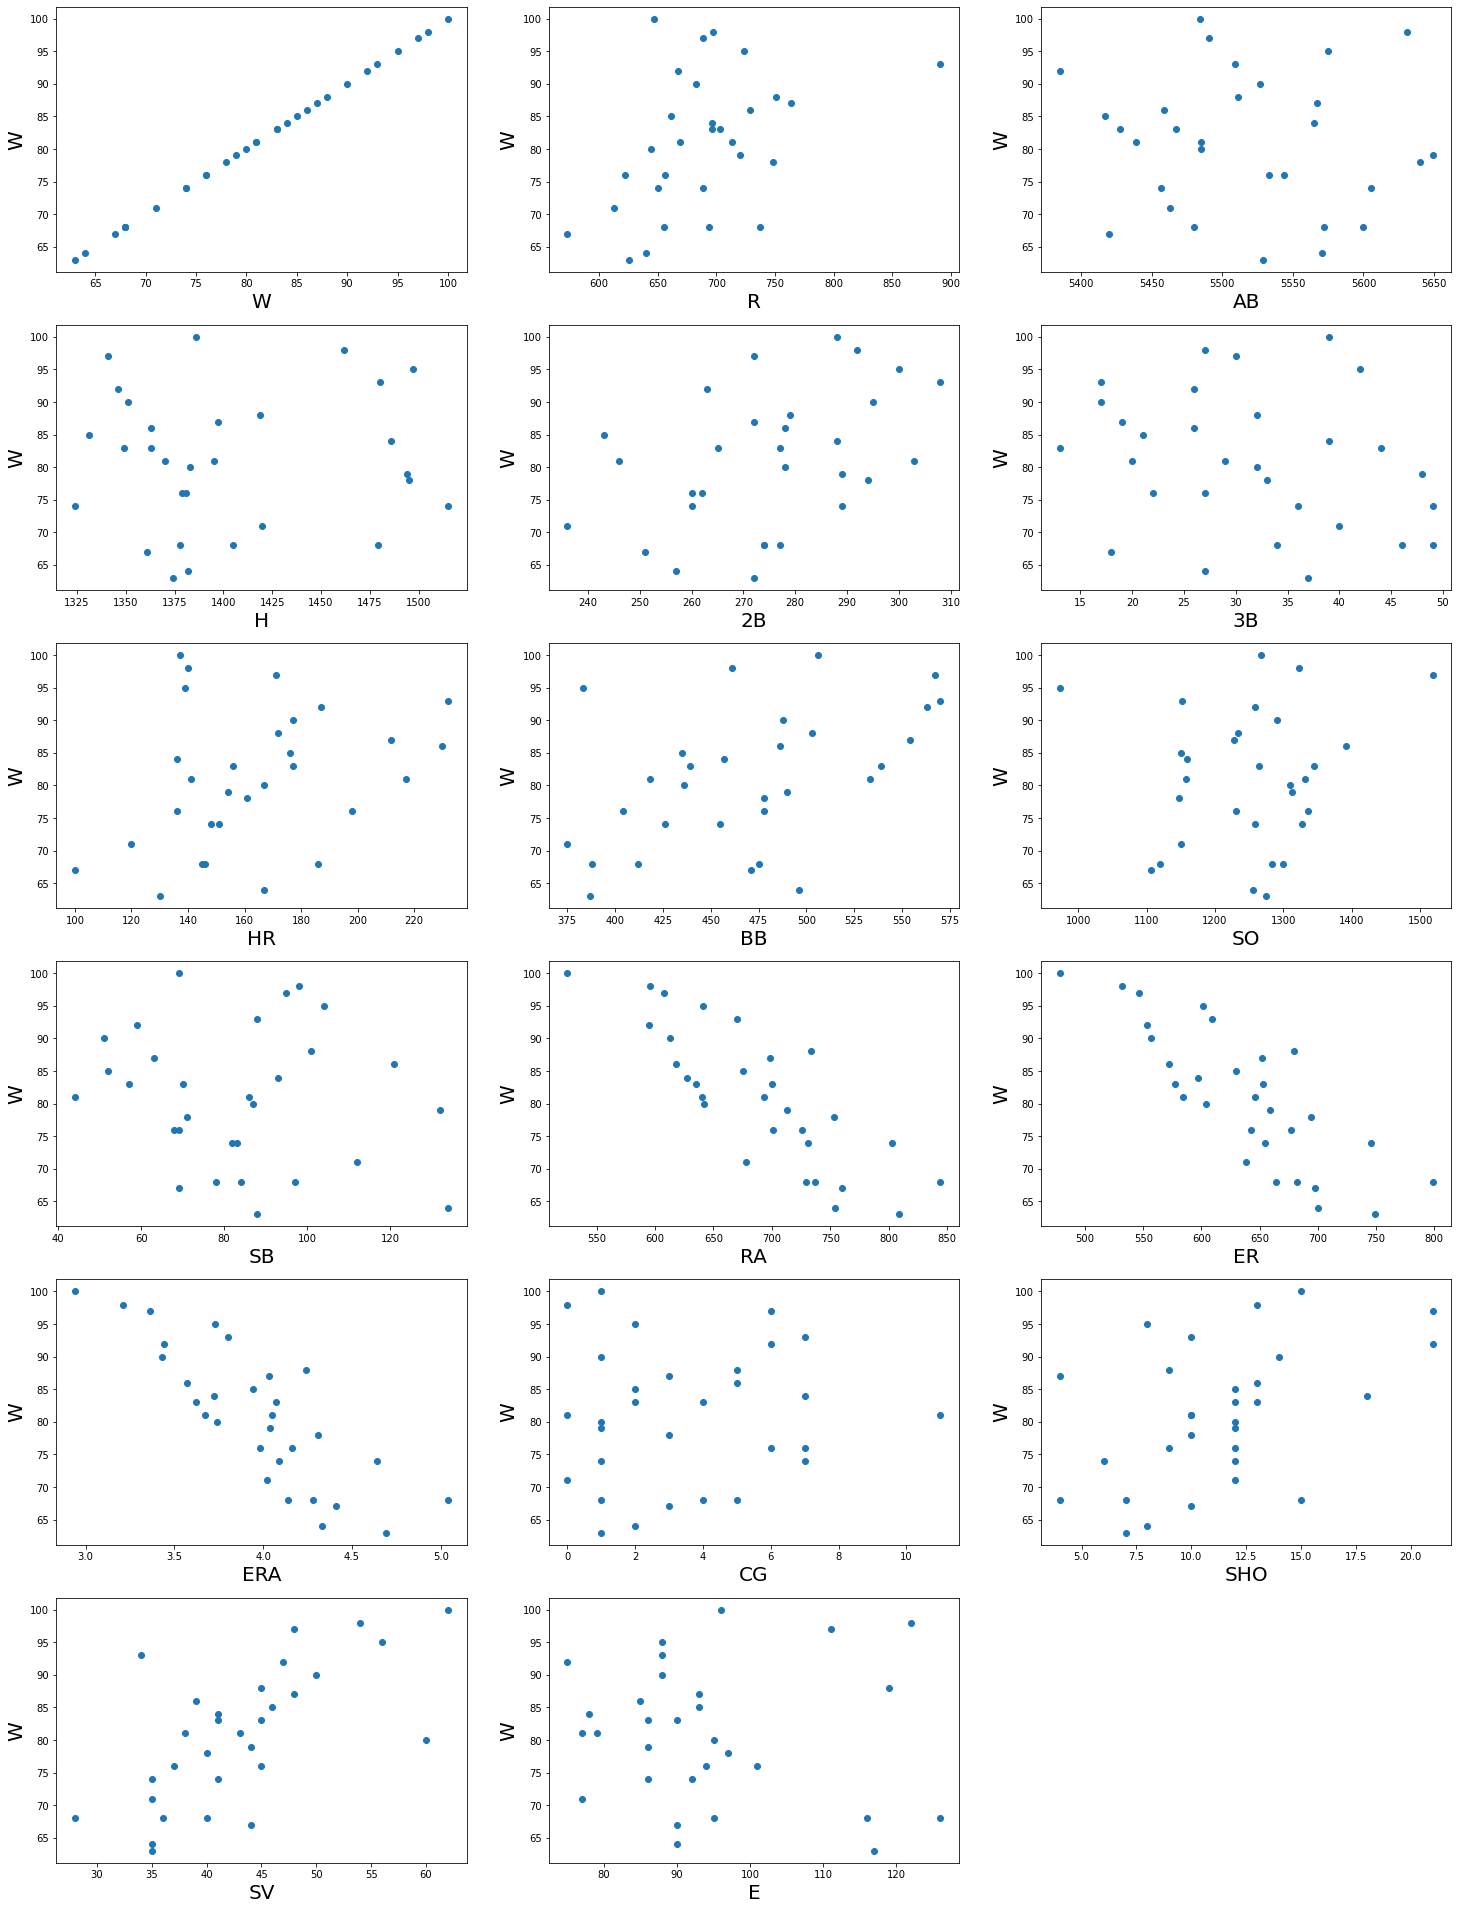

In [11]:
plt.figure(figsize=(25,40),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(7,3,plotnumber)
        plt.scatter(df[i],df['W'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber+=1
plt.show()

In [12]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


## Remove column with negative correlation

In [13]:
df=df.drop(['ER','E','AB','RA','SB','3B','ERA'],axis=1) #negative corelation
df

,W,R,H,2B,HR,BB,SO,CG,SHO,SV
0,95,724,1497,300,139,383,973,2,8,56
1,83,696,1349,277,156,439,1264,2,12,45
2,81,669,1395,303,141,533,1157,11,10,38
3,76,622,1381,260,136,404,1231,7,9,37
4,74,689,1515,289,151,455,1259,7,12,35
5,93,891,1480,308,232,570,1151,7,10,34
6,87,764,1397,272,212,554,1227,3,4,48
7,81,713,1370,246,217,418,1331,0,10,43
8,80,644,1383,278,167,436,1310,1,12,60
9,78,748,1495,294,161,478,1148,3,10,40


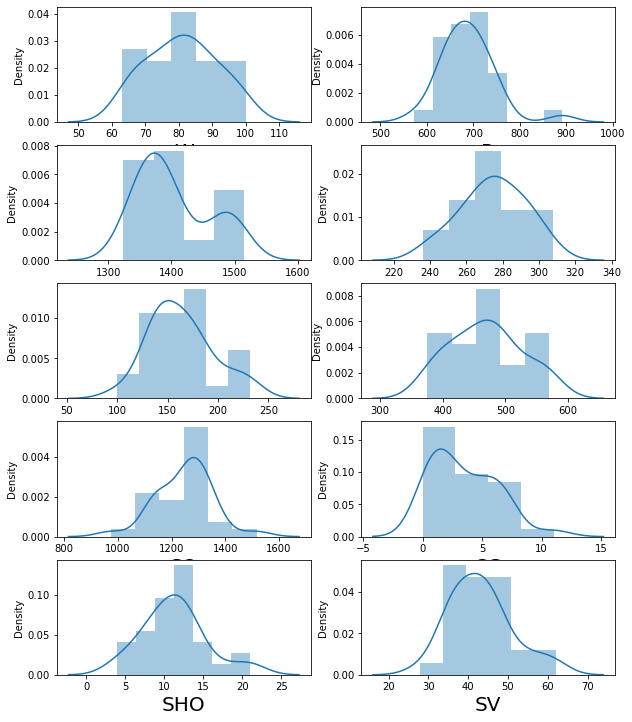

In [14]:
plt.figure(figsize=(10,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(10,2,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
from scipy.stats import zscore
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(30, 10)
(29, 10)


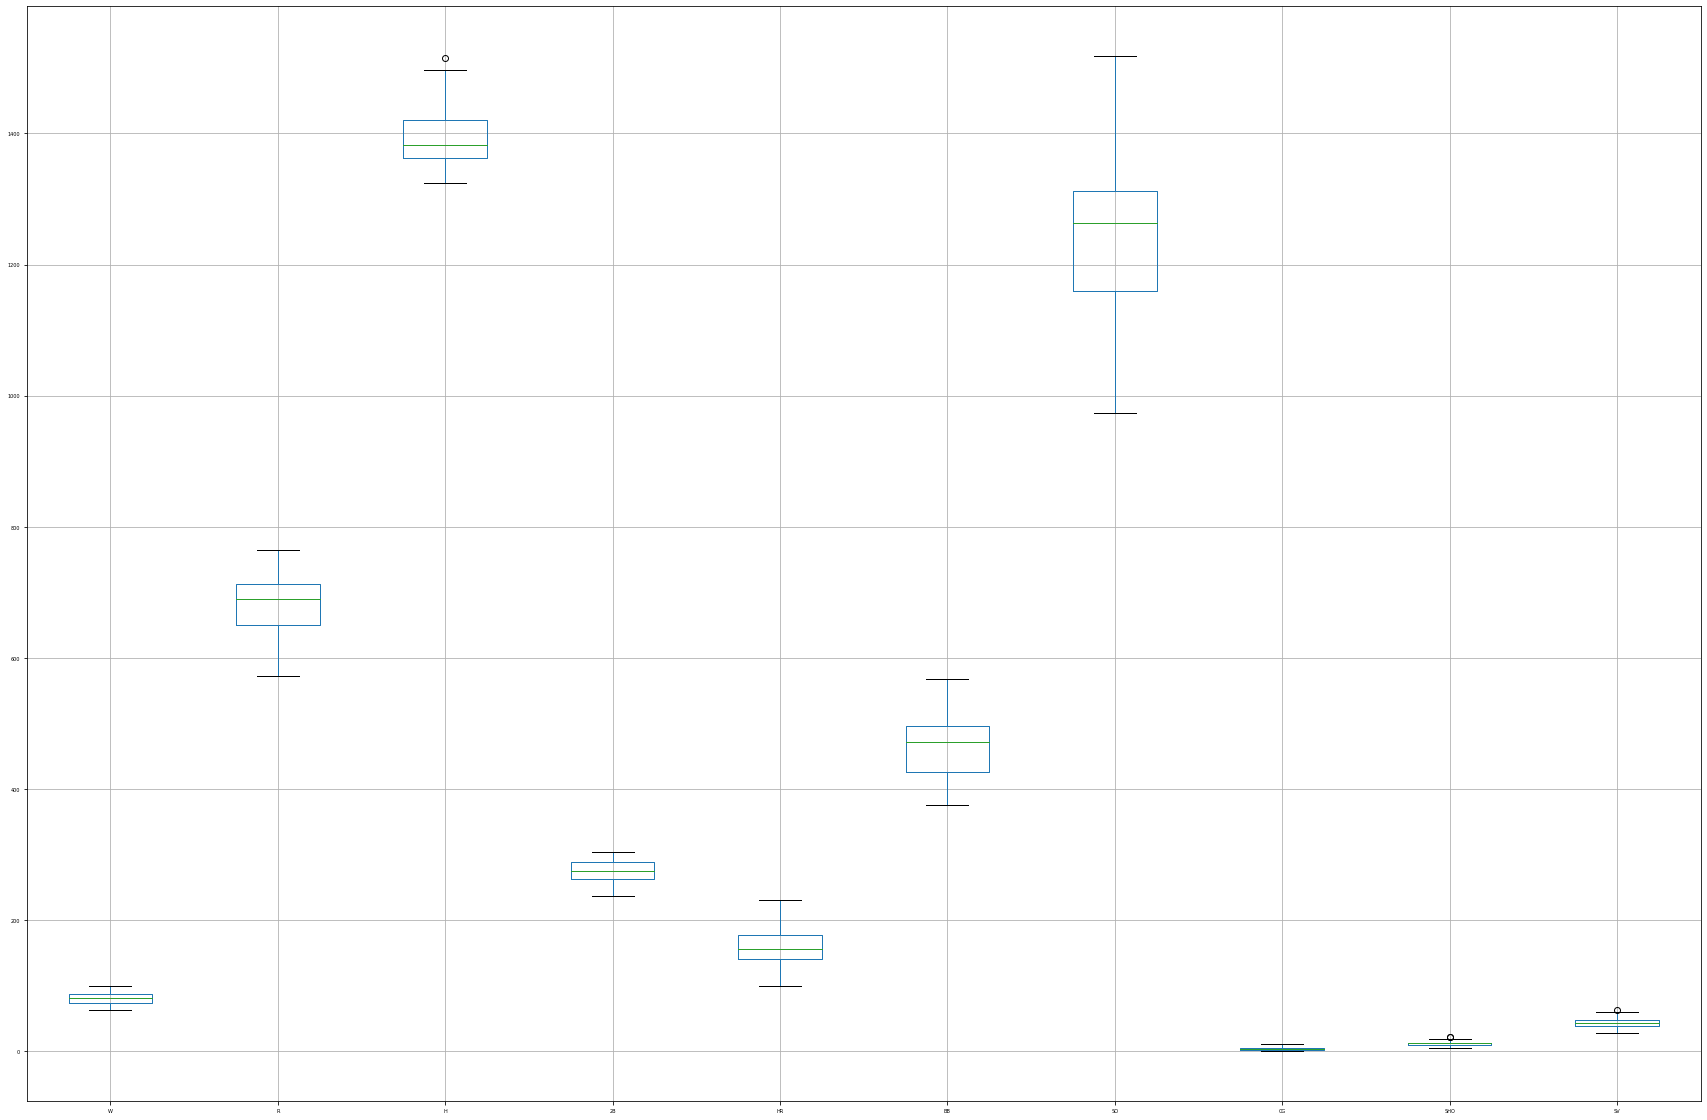

In [16]:
df_new.iloc[:,:].boxplot(figsize=[30,40],fontsize=5)#check for outliers
plt.subplots_adjust(bottom=0.5)
plt.show()

In [17]:
z_scr=zscore(df_new)
print(df_new.shape)
df_neww=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df_neww.shape)

(29, 10)
(29, 10)


In [18]:
import scipy.stats as stats
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(26, 10)

In [19]:
x = df_new.drop(columns = ['W','SO'])
y = df_new[['W']].values

In [20]:
print(x.skew())

R     -0.215364
H      0.783772
2B    -0.335304
HR     0.450862
BB     0.151193
CG     0.854980
SHO    0.526943
SV     0.627480
dtype: float64


In [21]:
print(len(x.skew().loc[x.skew()>0.55])) # Number of features having skewness more than 0.55 

3


In [22]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [23]:
x.skew().sort_values(ascending=False)

H      0.753696
SHO    0.526943
HR     0.450862
SV     0.280963
BB     0.151193
R     -0.215364
2B    -0.335304
CG    -1.013981
dtype: float64

In [24]:
sk=x.skew()
sk[np.abs(sk)>0.55].all()

True

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

## Multicollinear

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif["Features"] = x.columns
vif # vif>5 is extreme

,vif,Features
0,4.277363,R
1,2.540518,H
2,2.544645,2B
3,3.170966,HR
4,2.168995,BB
5,1.680787,CG
6,1.420638,SHO
7,1.517549,SV


In [27]:
from sklearn.decomposition import PCA
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.5093961192279863
3 0.6769707488228083
4 0.8340778793291976
5 0.9115084094790857
6 0.9523602794827656
7 0.9848816614689576


In [28]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_scaled)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [30]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor

models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [31]:
from sklearn.model_selection import cross_val_score
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 97,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=6,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score -0.02443327083997826
r2 0.3539111868768495
diff 0.3783444577168278
mae 7.617854591513084
rmse 8.61246684340978
**********
NuSVR()
score -0.04716341374563419
r2 -0.04840750690673001
diff 0.0012440931610958259
mae 9.196674665659726
rmse 10.971007532539666
**********
LinearRegression()
score -0.2514816038770664
r2 0.7967986942732547
diff 1.048280298150321
mae 4.3812457351767975
rmse 4.8299729599215455
**********
Ridge()
score -0.12108801162733451
r2 0.778622961069762
diff 0.8997109726970965
mae 4.49821584396673
rmse 5.041360326502145
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score -0.20060707699145755
r2 0.634649223207415
diff 0.8352563001988725
mae 5.756137712509196
rmse 6.476441839646713
**********
BayesianRidge()
score -0.07241546114659798
r2 0.7294879783184363
diff 0.8019034394650343
mae 4.956864516204519
rmse 5.572816427409791
**********
SGDRegressor()
score -0.30137864345711424
r2 0.7787579093233621
diff 1.0801365527804763
mae 

In [32]:
besttrain(KNeighborsRegressor(),principalComponents,y) #best random state

82

In [33]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=6,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 100}

In [34]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRFRegressor(), parameters, cv=6,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'max_depth': 7, 'n_estimators': 51, 'reg_lambda': 0.2}

In [35]:
parameters = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]
clf = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=parameters, cv=6, scoring='r2')
clf.fit(principalComponents, y)
clf.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [36]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, random_state=82, test_size=0.2)
stack = StackingCVRegressor(regressors=(KNeighborsRegressor(n_neighbors=5,weights='distance'), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=10),
                                        XGBRFRegressor(max_depth=7,n_estimators=51,reg_lambda=0.2)
                                       ),
                            meta_regressor= KNeighborsRegressor(n_neighbors=5,weights='distance'), 
                            cv=6,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.6487882342622503
r2 score train 0.7785129321199404


In [37]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(KNeighborsRegressor(n_neighbors=5,weights='distance'), 
                                        RandomForestRegressor(criterion='mse',max_features='auto',n_estimators=10),
                                        XGBRFRegressor(max_depth=7,n_estimators=51,reg_lambda=0.2)
                                       ),
                            meta_regressor=KNeighborsRegressor(n_neighbors=5,weights='distance'), 
                            cv=6,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),principalComponents,y,cv=6)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.6487882342622503
mean absolute error: 4.146037459828565
mean squared error: 25.687238310763746
root mean square error: 5.068257916756383
cross val score -0.014669123330198172
std err 0.6381282780529555


In [38]:
y_pred=stack.predict(principalComponents) #Compare side by side
data=x
data['WPred']=[round(i) for i in y_pred]
data['W']=y
data['differnce']=data['W']-data['WPred']
data

,R,H,2B,HR,BB,CG,SHO,SV,WPred,W,differnce
0,724,11.439506,300,139,383,1.259921,8,3.825862,90,95,5
1,696,11.049365,277,156,439,1.259921,12,3.556893,86,83,-3
2,669,11.173556,303,141,533,2.223980,10,3.361975,86,81,-5
3,622,11.136051,260,136,404,1.912931,9,3.332222,70,76,6
4,689,11.485173,289,151,455,1.912931,12,3.271066,75,74,-1
6,764,11.178893,272,212,554,1.442250,4,3.634241,90,87,-3
7,713,11.106405,246,217,418,0.000000,10,3.503398,83,81,-2
8,644,11.141425,278,167,436,1.000000,12,3.914868,84,80,-4
9,748,11.434409,294,161,478,1.442250,10,3.419952,80,78,-2
10,751,11.237270,279,172,503,1.709976,9,3.556893,91,88,-3


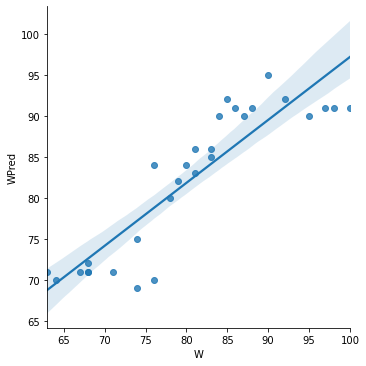

In [39]:
sn.lmplot(x='W',y='WPred',data=data) #GRAPH for actual and predicted values

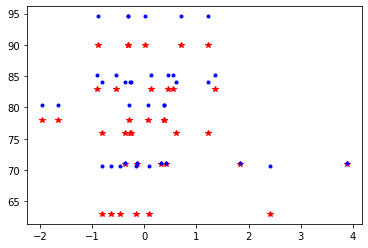

In [40]:
plt.plot(X_test,y_test,'r*') #SCATTERPLOT for actual and predicted values
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

<AxesSubplot:xlabel='WPred', ylabel='Density'>

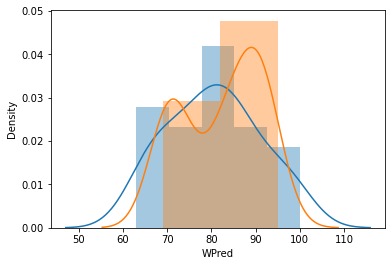

In [41]:
sn.distplot(data['W']) #DISTPLOT for actual and predicted values
sn.distplot(data['WPred'])

In [42]:
import joblib #Save model
joblib.dump(stack,'Baseball.pkl')

['Baseball.pkl']